13:24:16 - cmdstanpy - INFO - Chain [1] start processing
13:24:17 - cmdstanpy - INFO - Chain [1] done processing


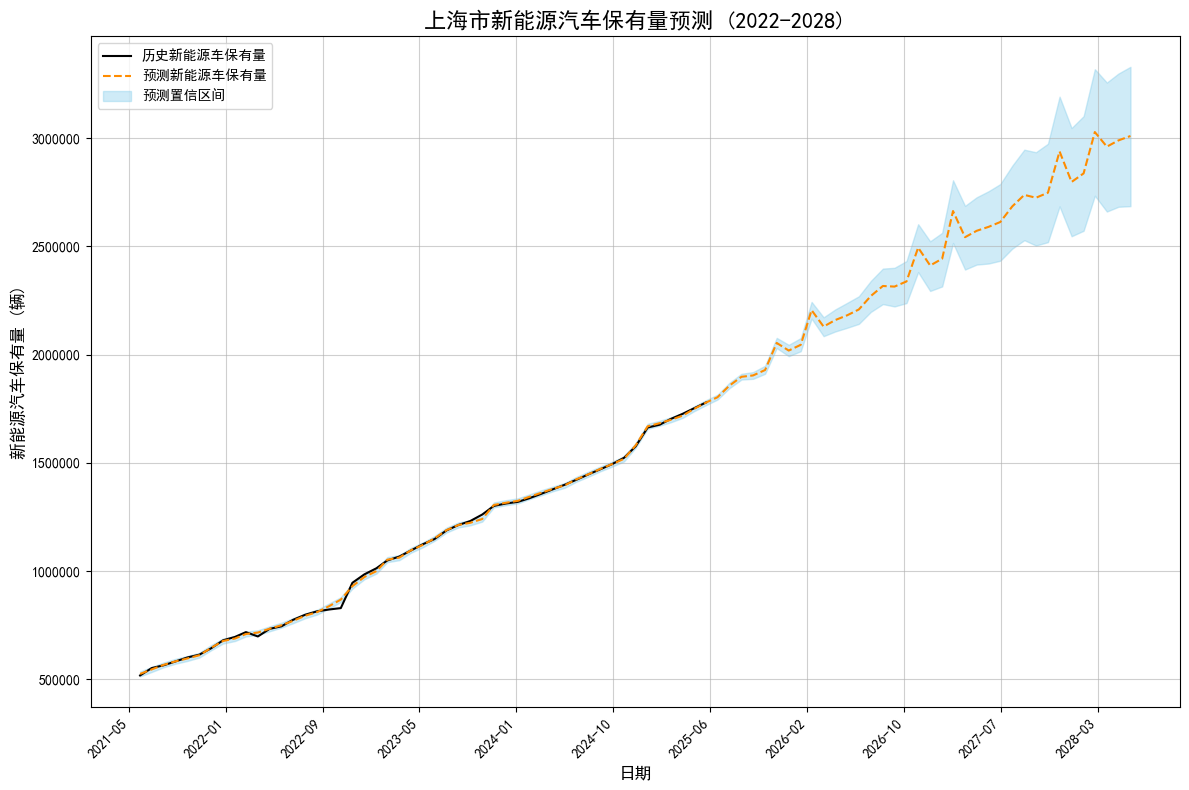

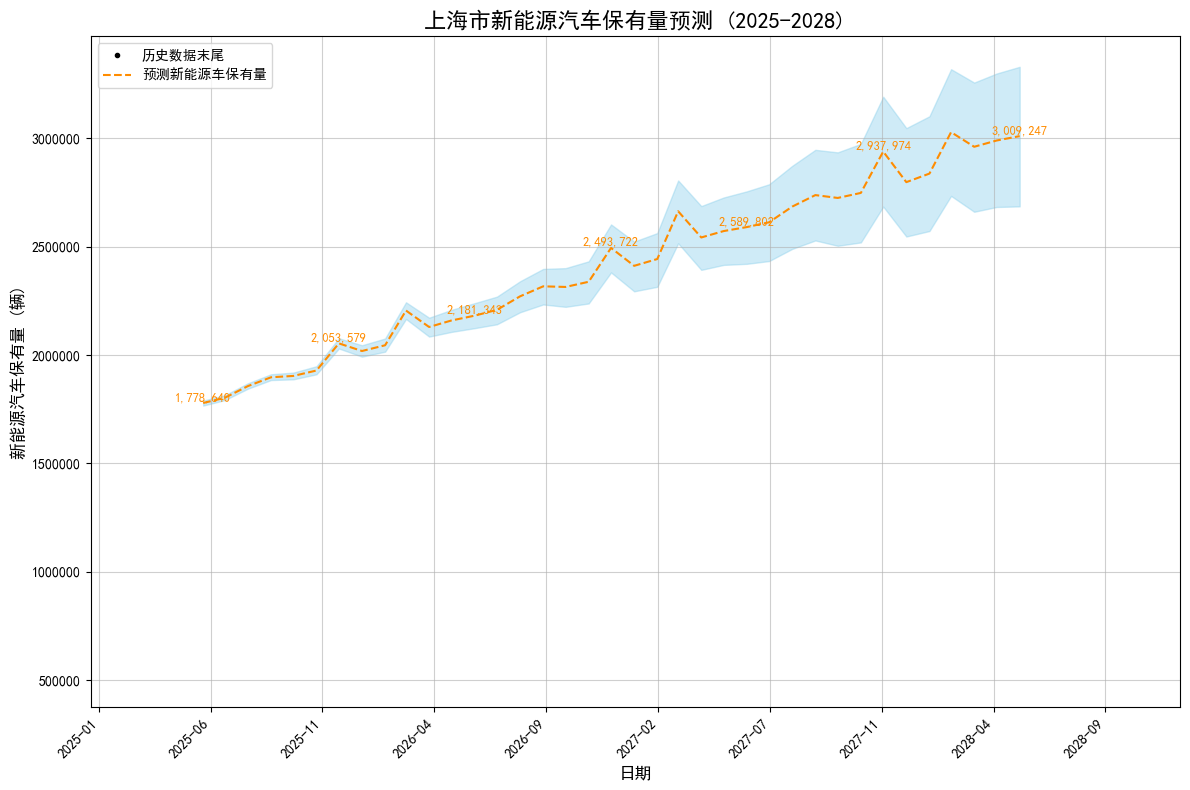

预测的未来新能源汽车保有量：
2025-06: 1802616 辆
2025-07: 1856601 辆
2025-08: 1897184 辆
2025-09: 1903491 辆
2025-10: 1928482 辆
2025-11: 2053579 辆
2025-12: 2018381 辆
2026-01: 2044849 辆
2026-02: 2204912 辆
2026-03: 2129081 辆
2026-04: 2159188 辆
2026-05: 2181343 辆
2026-06: 2208178 辆
2026-07: 2270481 辆
2026-08: 2316562 辆
2026-09: 2313736 辆
2026-10: 2337602 辆
2026-11: 2493722 辆
2026-12: 2411153 辆
2027-01: 2442505 辆
2027-02: 2662707 辆
2027-03: 2541900 辆
2027-04: 2571353 辆
2027-05: 2589802 辆
2027-06: 2611993 辆
2027-07: 2684233 辆
2027-08: 2737274 辆
2027-09: 2724129 辆
2027-10: 2747279 辆
2027-11: 2937974 辆
2027-12: 2797003 辆
2028-01: 2836447 辆
2028-02: 3027459 辆
2028-03: 2960085 辆
2028-04: 2988904 辆
2028-05: 3009247 辆


In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
import streamlit as st
# 1. 加载数据并预处理
df = pd.read_csv('shanghai_ev_data_vehicle_to_charger_ratio.csv')

# 清理 'Ev Stock' 列，去掉逗号并转换为数字
df['Ev Stock'] = df['Ev Stock'].str.replace(',', '').astype(float) 

# 将日期列转换为日期格式
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')

# 2. 准备 Prophet 模型所需的格式
df_prophet = df.rename(columns={'Date': 'ds', 'Ev Stock': 'y'})

# 3. 训练 Prophet 模型
model = Prophet(seasonality_mode='multiplicative')
model.fit(df_prophet)

# 4. 创建未来36个月的日期框架 (多预测3年)
future = model.make_future_dataframe(periods=36, freq='M') 

# 5. 进行预测
forecast = model.predict(future)

# --- 绘图部分 ---

import matplotlib

matplotlib.rcParams['font.sans-serif'] = ['SimHei'] #font.sans-serif参数来指定"SimHei"字体
matplotlib.rcParams['axes.unicode_minus'] = False	#axes.unicode_minus参数用于显示负号

# 6. 绘制第一张图：整体趋势图 (2022-2028年)
fig, ax = plt.subplots(figsize=(12, 8))

# 绘制历史数据（移除点标记）
ax.plot(df_prophet['ds'], df_prophet['y'], 'k-', label='历史新能源车保有量')

# 绘制 Prophet 的预测趋势 (橙色虚线)
ax.plot(forecast['ds'], forecast['yhat'], color='darkorange', linestyle='--', label='预测新能源车保有量')

# 绘制 Prophet 的置信区间 (蓝色区域)
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='skyblue', alpha=0.4, label='预测置信区间')

# 设置纵坐标格式：使用普通数字格式，不带千位分隔符，避免字体问题
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.get_major_formatter().set_scientific(False)

# 设置横坐标格式：以月为单位显示
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=12)) # 调整x轴刻度数量
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.title('上海市新能源汽车保有量预测 (2022-2028)', fontsize=16)
plt.xlabel('日期', fontsize=12)
plt.ylabel('新能源汽车保有量 (辆)', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, linestyle='-', alpha=0.6)
plt.tight_layout()
plt.show()

# 7. 绘制第二张图：预测细节图 (2025-2028年，每半年标注数据)
fig, ax = plt.subplots(figsize=(12, 8))

# 筛选出预测数据（从历史数据最后一个点开始）
forecast_future = forecast[forecast['ds'] >= df_prophet['ds'].max()]

# 绘制历史数据（最后一个点）
ax.plot(df_prophet['ds'].iloc[-1:], df_prophet['y'].iloc[-1:], 'k.', label='历史数据末尾')

# 绘制预测趋势线和置信区间
ax.plot(forecast_future['ds'], forecast_future['yhat'], color='darkorange', linestyle='--', label='预测新能源车保有量')
ax.fill_between(forecast_future['ds'], forecast_future['yhat_lower'], forecast_future['yhat_upper'], color='skyblue', alpha=0.4)

# 在预测数据上每隔6个月添加数据标签
for i in range(0, len(forecast_future), 6):
    row = forecast_future.iloc[i]
    ax.text(row['ds'], row['yhat'], f'{int(row["yhat"]):,}', ha='center', va='bottom', fontsize=9, color='darkorange')

# 设置纵坐标格式
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.get_major_formatter().set_scientific(False)

# 设置横坐标格式：以月为单位显示
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=12))
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# 手动设置x轴范围，只显示2025-2028年
ax.set_xlim(pd.to_datetime('2025-01-01'), pd.to_datetime('2029-01-01'))

plt.title('上海市新能源汽车保有量预测 (2025-2028)', fontsize=16)
plt.xlabel('日期', fontsize=12)
plt.ylabel('新能源汽车保有量 (辆)', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, linestyle='-', alpha=0.6)
plt.tight_layout()
plt.show()

# 8. 打印预测结果
print("预测的未来新能源汽车保有量：")
for index, row in forecast.tail(36).iterrows():
    print(f"{row['ds'].strftime('%Y-%m')}: {int(row['yhat'])} 辆")

15:24:45 - cmdstanpy - INFO - Chain [1] start processing
15:24:45 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\enxin\AppData\Local\Temp\ipykernel_27392\4045844599.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick:.2f}%' for tick in ax.get_yticks()])


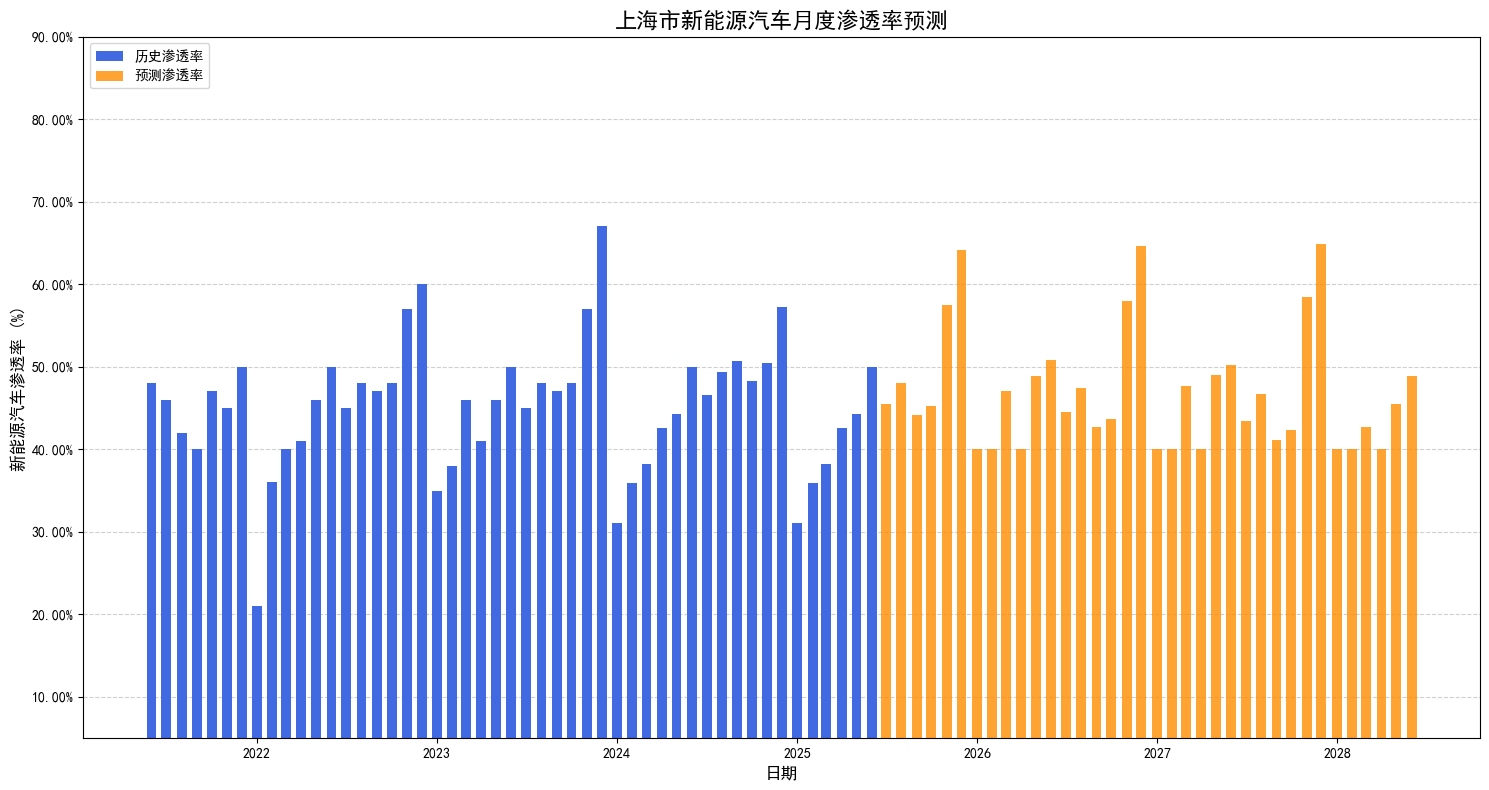

预测的未来新能源汽车渗透率：
2025-06: 55.50%
2025-07: 58.06%
2025-08: 54.14%
2025-09: 55.21%
2025-10: 67.48%
2025-11: 74.16%
2025-12: 50.00%
2026-01: 50.00%
2026-02: 56.99%
2026-03: 50.00%
2026-04: 58.85%
2026-05: 60.85%
2026-06: 54.46%
2026-07: 57.38%
2026-08: 52.64%
2026-09: 53.71%
2026-10: 67.97%
2026-11: 74.56%
2026-12: 50.00%
2027-01: 50.00%
2027-02: 57.71%
2027-03: 50.00%
2027-04: 58.97%
2027-05: 60.19%
2027-06: 53.41%
2027-07: 56.68%
2027-08: 51.16%
2027-09: 52.28%
2027-10: 68.45%
2027-11: 74.87%
2027-12: 50.00%
2028-01: 50.00%
2028-02: 52.65%
2028-03: 50.00%
2028-04: 55.52%
2028-05: 58.85%


In [55]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
import numpy as np
from sklearn.linear_model import LinearRegression

# 解决字体显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 1. 加载数据并进行彻底的数据清洗
df = pd.read_csv('shanghai_ev_data_vehicle_to_charger_ratio.csv')

# 将日期列转换为日期格式
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')

# 将所有可能包含逗号的列转换为数值类型，并处理空值
numeric_cols = ['Ev Sales', 'Car Sales', 'Charger Count']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

# 2. 计算渗透率并创建补贴政策回归因子
df['Penetration Rate'] = (df['Ev Sales'] / df['Car Sales']) * 100

# 根据政策报告创建补贴力度回归因子
df['Subsidy Strength'] = 0.0

# 确保日期比较都是在 Timestamp 类型之间进行
# 2022年6月1日政策出台，补贴1万元
mask_2022_2023 = (df['Date'] >= pd.to_datetime('2022-06-01')) & (df['Date'] <= pd.to_datetime('2023-12-31'))
df.loc[mask_2022_2023, 'Subsidy Strength'] = 1.0

# 2024年和2025年补贴提高到1.5万元
mask_2024_onward = (df['Date'] >= pd.to_datetime('2024-01-01'))
df.loc[mask_2024_onward, 'Subsidy Strength'] = 1.5

# 3. 准备 Prophet 模型所需的格式
df_prophet = df[['Date', 'Penetration Rate', 'Charger Count', 'Subsidy Strength']].dropna()
df_prophet = df_prophet.rename(columns={'Date': 'ds', 'Penetration Rate': 'y'})

# 4. 预测未来的充电桩数量
# 训练线性回归模型来预测未来的充电桩数量
charger_model = LinearRegression()
X_charger = np.arange(len(df_prophet)).reshape(-1, 1)
y_charger = df_prophet['Charger Count']
charger_model.fit(X_charger, y_charger)

# 预测所有日期的充电桩数量
X_all_dates = np.arange(len(df_prophet) + 36).reshape(-1, 1)
all_charger_count = charger_model.predict(X_all_dates)

# 5. 训练 Prophet 模型并进行预测
model = Prophet(growth='linear', seasonality_mode='multiplicative', seasonality_prior_scale=1.0)
model.add_regressor('Charger Count', prior_scale=0.01)
model.add_regressor('Subsidy Strength', prior_scale=0.01)
model.fit(df_prophet)

# 创建未来36个月的日期框架 (预测3年)
future = model.make_future_dataframe(periods=36, freq='M', include_history=True)

# 将预测的充电桩数量添加到未来的数据框架中
future['Charger Count'] = all_charger_count
future['Subsidy Strength'] = 1.5
future.loc[:len(df_prophet) - 1, 'Subsidy Strength'] = df_prophet['Subsidy Strength'].values

# 进行预测
forecast = model.predict(future)

# 6. 强制性上下限控制
# 关键修改：直接将预测结果强制性限制在 50% 到 80% 之间
forecast['yhat'] = np.clip(forecast['yhat'], a_min=50, a_max=80)
forecast['yhat_lower'] = np.clip(forecast['yhat_lower'], a_min=50, a_max=80)
forecast['yhat_upper'] = np.clip(forecast['yhat_upper'], a_min=50, a_max=80)

# --- 绘图部分 ---

# 7. 绘制渗透率预测图
fig, ax = plt.subplots(figsize=(15, 8))

# 获取历史数据和预测数据
history_data = df_prophet
forecast_data = forecast.tail(36)

# 绘制历史数据（蓝色柱状图）
ax.bar(history_data['ds'], history_data['y'], color='royalblue', label='历史渗透率', width=20, zorder=2)

# 绘制预测数据（橙色柱状图）
ax.bar(forecast_data['ds'], forecast_data['yhat'], color='darkorange', alpha=0.8, label='预测渗透率', width=20, zorder=2)

# 设置图表标题和标签
ax.set_title('上海市新能源汽车月度渗透率预测', fontsize=16)
ax.set_xlabel('日期', fontsize=12)
ax.set_ylabel('新能源汽车渗透率 (%)', fontsize=12)

# 设置纵坐标格式
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax.set_yticklabels([f'{tick:.2f}%' for tick in ax.get_yticks()])

# 关键修改：设置纵坐标范围，从 30% 开始到 100% 结束
ax.set_ylim(15, 100)

ax.legend(loc='upper left')
ax.grid(True, linestyle='--', alpha=0.6, axis='y')
plt.tight_layout()
plt.show()

# 8. 打印预测结果
print("预测的未来新能源汽车渗透率：")
for index, row in forecast.tail(36).iterrows():
    print(f"{row['ds'].strftime('%Y-%m')}: {row['yhat']:.2f}%")

16:46:37 - cmdstanpy - INFO - Chain [1] start processing
16:46:37 - cmdstanpy - INFO - Chain [1] done processing
16:46:37 - cmdstanpy - INFO - Chain [1] start processing
16:46:38 - cmdstanpy - INFO - Chain [1] done processing


历史平均车桩比（合理比例）：7.20

--- 预测结果 ---
未来一年（2026年5月）的新能源汽车保有量：2,611,993 辆
未来一年（2026年5月）的充电桩数量：354,888 个
为满足合理车桩比所需充电桩数量：362,808 个
未来一年充电桩缺口：7,920 个


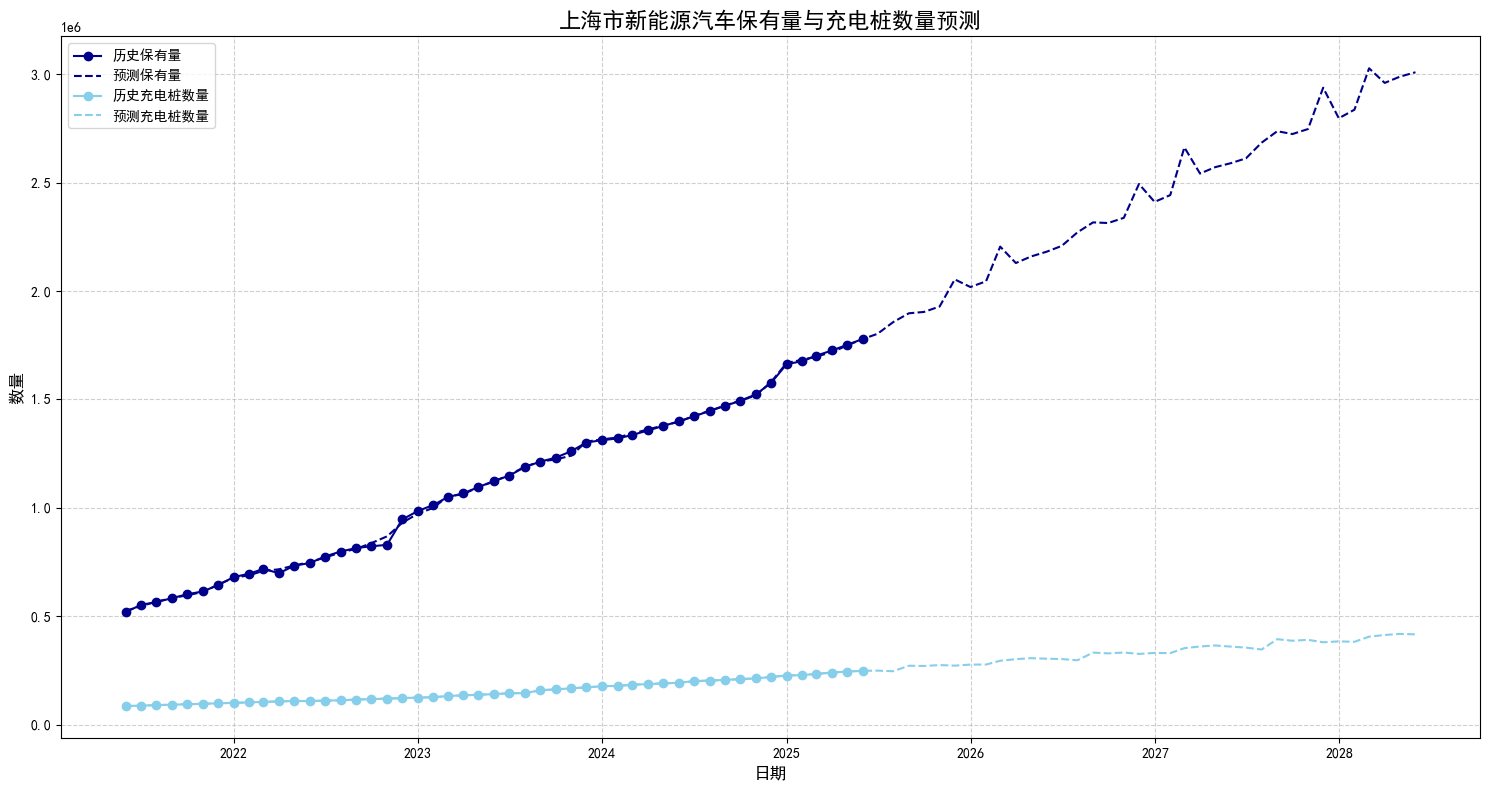

In [66]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
import numpy as np

# 解决matplotlib中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 1. 数据加载与清洗
try:
    df = pd.read_csv('shanghai_ev_data_vehicle_to_charger_ratio.csv')
except FileNotFoundError:
    print("错误：未找到 shanghai_ev_data_vehicle_to_charger_ratio.csv 文件。请确保文件与代码在同一目录下。")
    exit()

# 将日期列转换为日期格式
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')

# 将关键数值列转换为数值类型，并处理逗号
numeric_cols = ['Ev Stock', 'Charger Count', 'Vehicle to Charger Ratio']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

# 丢弃包含NaN的行
df = df.dropna(subset=['Ev Stock', 'Charger Count', 'Vehicle to Charger Ratio'])

# 2. 预测新能源汽车保有量 (Ev Stock)
df_ev = df.rename(columns={'Date': 'ds', 'Ev Stock': 'y'})
m_ev = Prophet(growth='linear', seasonality_mode='multiplicative')
m_ev.fit(df_ev)
future_ev = m_ev.make_future_dataframe(periods=36, freq='M', include_history=True) # 预测3年
forecast_ev = m_ev.predict(future_ev)

# 3. 预测充电桩数量 (Charger Count)
df_charger = df.rename(columns={'Date': 'ds', 'Charger Count': 'y'})
m_charger = Prophet(growth='linear', seasonality_mode='multiplicative')
m_charger.fit(df_charger)
future_charger = m_charger.make_future_dataframe(periods=36, freq='M', include_history=True) # 预测3年
forecast_charger = m_charger.predict(future_charger)

# 4. 计算并量化充电桩缺口
# 计算历史数据的平均车桩比作为合理比例
target_ratio = df['Vehicle to Charger Ratio'].mean()
print(f"历史平均车桩比（合理比例）：{target_ratio:.2f}")

# 获取未来一年（最后一个月）的预测数据
future_ev_stock = forecast_ev['yhat'].iloc[-12]
future_charger_count = forecast_charger['yhat'].iloc[-12]

# 计算未来一年所需的充电桩数量
required_chargers = future_ev_stock / target_ratio
charging_gap = required_chargers - future_charger_count

print("\n--- 预测结果 ---")
print(f"未来一年（2026年5月）的新能源汽车保有量：{future_ev_stock:,.0f} 辆")
print(f"未来一年（2026年5月）的充电桩数量：{future_charger_count:,.0f} 个")
print(f"为满足合理车桩比所需充电桩数量：{required_chargers:,.0f} 个")
print(f"未来一年充电桩缺口：{charging_gap:,.0f} 个")

# 5. 可视化预测结果 (使用折线图)
plt.figure(figsize=(15, 8))

# 绘制历史和预测的保有量（深蓝色）
plt.plot(df_ev['ds'], df_ev['y'], color='darkblue', marker='o', linestyle='-', label='历史保有量')
plt.plot(forecast_ev['ds'], forecast_ev['yhat'], color='darkblue', linestyle='--', label='预测保有量')

# 绘制历史和预测的充电桩数量（浅蓝色）
plt.plot(df_charger['ds'], df_charger['y'], color='skyblue', marker='o', linestyle='-', label='历史充电桩数量')
plt.plot(forecast_charger['ds'], forecast_charger['yhat'], color='skyblue', linestyle='--', label='预测充电桩数量')

plt.title('上海市新能源汽车保有量与充电桩数量预测', fontsize=16)
plt.xlabel('日期', fontsize=12)
plt.ylabel('数量', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

17:02:00 - cmdstanpy - INFO - Chain [1] start processing
17:02:01 - cmdstanpy - INFO - Chain [1] done processing
17:02:01 - cmdstanpy - INFO - Chain [1] start processing
17:02:01 - cmdstanpy - INFO - Chain [1] done processing


历史平均车桩比（合理比例）：7.20

--- 预测结果 ---
未来一年（2026年5月）的新能源汽车保有量：2,611,993 辆
未来一年（2026年5月）的充电桩数量：354,888 个
为满足合理车桩比所需充电桩数量：362,808 个
未来一年充电桩缺口：7,920 个


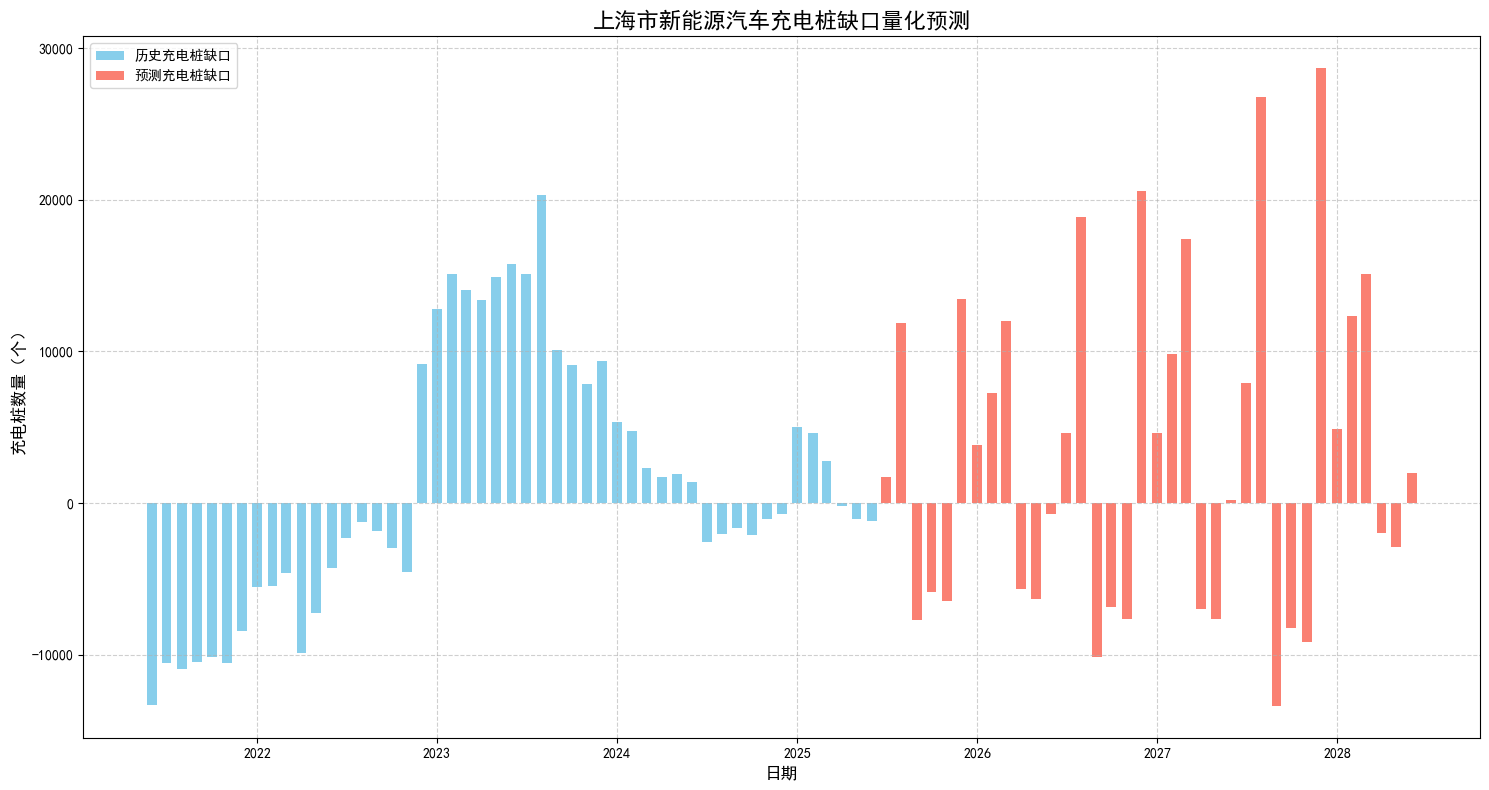

In [72]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
import numpy as np

# 解决matplotlib中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 1. 数据加载与清洗
try:
    df = pd.read_csv('shanghai_ev_data_vehicle_to_charger_ratio.csv')
except FileNotFoundError:
    print("错误：未找到 shanghai_ev_data_vehicle_to_charger_ratio.csv 文件。请确保文件与代码在同一目录下。")
    exit()

# 将日期列转换为日期格式
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')

# 将关键数值列转换为数值类型，并处理逗号
numeric_cols = ['Ev Stock', 'Charger Count', 'Vehicle to Charger Ratio']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

# 丢弃包含NaN的行
df = df.dropna(subset=['Ev Stock', 'Charger Count', 'Vehicle to Charger Ratio'])

# 2. 预测新能源汽车保有量 (Ev Stock)
df_ev = df.rename(columns={'Date': 'ds', 'Ev Stock': 'y'})
m_ev = Prophet(growth='linear', seasonality_mode='multiplicative')
m_ev.fit(df_ev)
future_ev = m_ev.make_future_dataframe(periods=36, freq='M', include_history=True)
forecast_ev = m_ev.predict(future_ev)

# 3. 预测充电桩数量 (Charger Count)
df_charger = df.rename(columns={'Date': 'ds', 'Charger Count': 'y'})
m_charger = Prophet(growth='linear', seasonality_mode='multiplicative')
m_charger.fit(df_charger)
future_charger = m_charger.make_future_dataframe(periods=36, freq='M', include_history=True)
forecast_charger = m_charger.predict(future_charger)

# 4. 计算并量化充电桩缺口
# 计算历史数据的平均车桩比作为合理比例
target_ratio = df['Vehicle to Charger Ratio'].mean()
print(f"历史平均车桩比（合理比例）：{target_ratio:.2f}")

# 获取未来一年（最后一个月）的预测数据
future_ev_stock = forecast_ev['yhat'].iloc[-12]
future_charger_count = forecast_charger['yhat'].iloc[-12]

# 计算未来一年所需的充电桩数量
required_chargers = future_ev_stock / target_ratio
charging_gap = required_chargers - future_charger_count

print("\n--- 预测结果 ---")
print(f"未来一年（2026年5月）的新能源汽车保有量：{future_ev_stock:,.0f} 辆")
print(f"未来一年（2026年5月）的充电桩数量：{future_charger_count:,.0f} 个")
print(f"为满足合理车桩比所需充电桩数量：{required_chargers:,.0f} 个")
print(f"未来一年充电桩缺口：{charging_gap:,.0f} 个")


# 5. 可视化充电桩缺口 (使用柱状图)
plt.figure(figsize=(15, 8))
# 计算历史和预测的充电桩缺口
history_gap = (df_ev['y'] / target_ratio) - df_charger['y']
forecast_gap = (forecast_ev['yhat'] / target_ratio) - forecast_charger['yhat']

# 绘制历史缺口（淡蓝色）
plt.bar(df_ev['ds'], history_gap, color='skyblue', label='历史充电桩缺口', width=20)
# 绘制预测缺口（红色）
plt.bar(forecast_ev['ds'].iloc[-36:], forecast_gap.iloc[-36:], color='salmon', label='预测充电桩缺口', width=20)

plt.title('上海市新能源汽车充电桩缺口量化预测', fontsize=16)
plt.xlabel('日期', fontsize=12)
plt.ylabel('充电桩数量（个）', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

19:58:45 - cmdstanpy - INFO - Chain [1] start processing
19:58:46 - cmdstanpy - INFO - Chain [1] done processing
19:58:46 - cmdstanpy - INFO - Chain [1] start processing
19:58:46 - cmdstanpy - INFO - Chain [1] done processing
19:58:46 - cmdstanpy - INFO - Chain [1] start processing


历史平均车桩比（合理比例）：7.20


19:58:46 - cmdstanpy - INFO - Chain [1] done processing


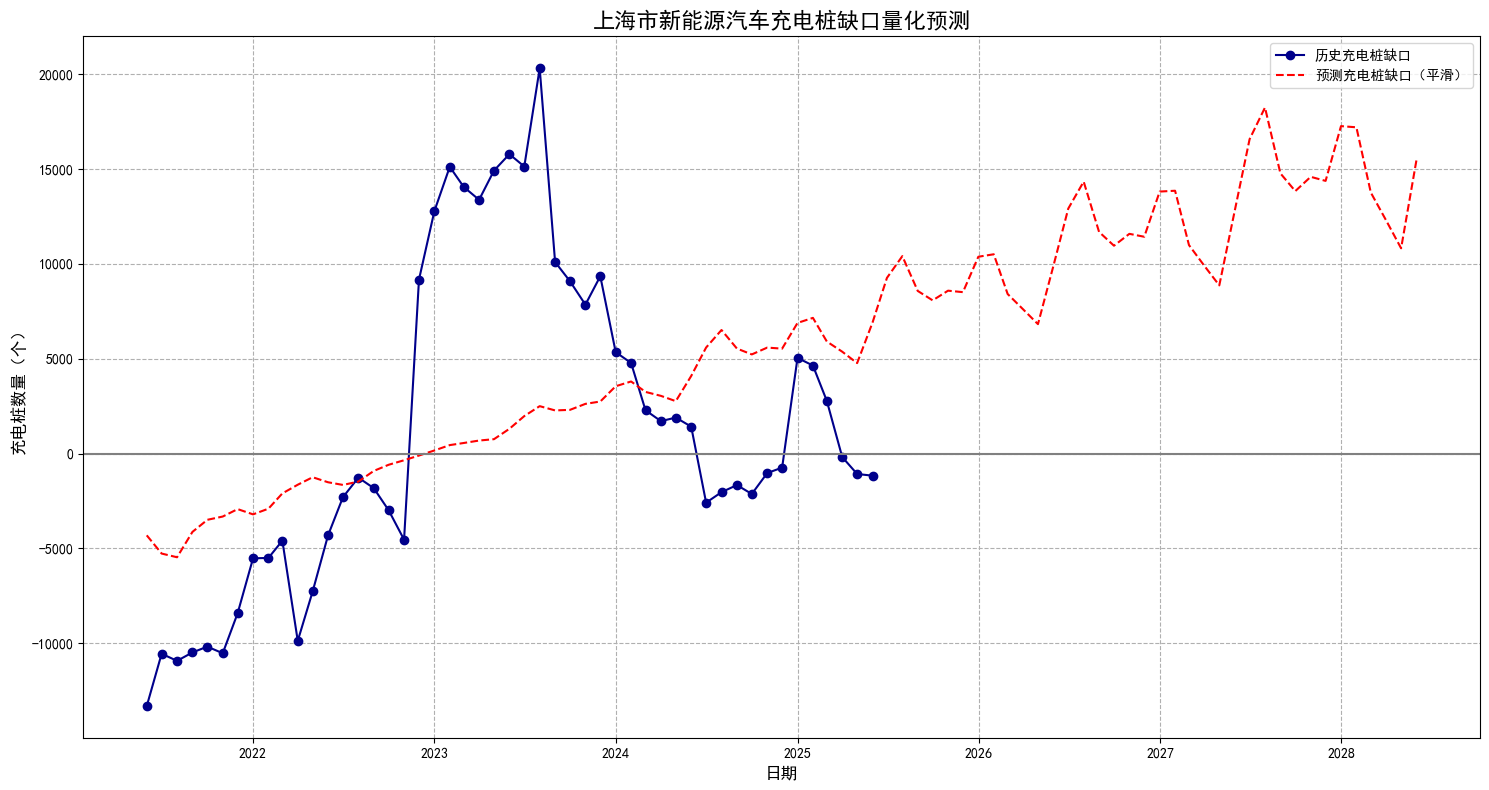


--- 未来一年充电桩缺口预测（平滑版）---
2027-06: 缺口 16,568 个
2027-07: 缺口 18,239 个
2027-08: 缺口 14,768 个
2027-09: 缺口 13,833 个
2027-10: 缺口 14,586 个
2027-11: 缺口 14,371 个
2027-12: 缺口 17,257 个
2028-01: 缺口 17,196 个
2028-02: 缺口 13,757 个
2028-03: 缺口 12,280 个
2028-04: 缺口 10,818 个
2028-05: 缺口 15,483 个


In [82]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
import numpy as np

# 解决matplotlib中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 1. 数据加载与清洗
try:
    df = pd.read_csv('shanghai_ev_data_vehicle_to_charger_ratio.csv')
except FileNotFoundError:
    print("错误：未找到 shanghai_ev_data_vehicle_to_charger_ratio.csv 文件。请确保文件与代码在同一目录下。")
    exit()

# 将日期列转换为日期格式
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')

# 将关键数值列转换为数值类型，并处理逗号
numeric_cols = ['Ev Stock', 'Charger Count', 'Vehicle to Charger Ratio']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

# 丢弃包含NaN的行
df = df.dropna(subset=['Ev Stock', 'Charger Count', 'Vehicle to Charger Ratio'])

# 2. 预测新能源汽车保有量 (Ev Stock)
df_ev = df.rename(columns={'Date': 'ds', 'Ev Stock': 'y'})
m_ev = Prophet(growth='linear', seasonality_mode='multiplicative')
m_ev.fit(df_ev)
future_ev = m_ev.make_future_dataframe(periods=36, freq='M', include_history=True) # 预测3年
forecast_ev = m_ev.predict(future_ev)

# 3. 预测充电桩数量 (Charger Count)
df_charger = df.rename(columns={'Date': 'ds', 'Charger Count': 'y'})
m_charger = Prophet(growth='linear', seasonality_mode='multiplicative')
m_charger.fit(df_charger)
future_charger = m_charger.make_future_dataframe(periods=36, freq='M', include_history=True) # 预测3年
forecast_charger = m_charger.predict(future_charger)

# 4. 计算充电桩缺口
# 计算历史数据的平均车桩比作为合理比例
target_ratio = df['Vehicle to Charger Ratio'].mean()
print(f"历史平均车桩比（合理比例）：{target_ratio:.2f}")

# 计算历史充电桩缺口
history_gap = (df_ev['y'] / target_ratio) - df_charger['y']
# 计算预测的充电桩缺口
forecast_gap = (forecast_ev['yhat'] / target_ratio) - forecast_charger['yhat']

# 5. 可视化充电桩缺口 (使用折线图)
plt.figure(figsize=(15, 8))

# 绘制历史缺口（蓝色实线）
plt.plot(df_ev['ds'], history_gap, color='darkblue', marker='o', linestyle='-', label='历史充电桩缺口')

# 绘制预测缺口（红色虚线）
# 调整seasonality_prior_scale参数来平滑曲线
m_gap = Prophet(growth='linear', seasonality_mode='multiplicative', seasonality_prior_scale=0.35) # 减小季节性影响
df_gap = pd.DataFrame({'ds': df_ev['ds'], 'y': history_gap})
m_gap.fit(df_gap)
future_gap = m_gap.make_future_dataframe(periods=36, freq='M', include_history=True)
forecast_gap_smoothed = m_gap.predict(future_gap)

plt.plot(forecast_gap_smoothed['ds'], forecast_gap_smoothed['yhat'], color='red', linestyle='--', label='预测充电桩缺口（平滑）')

# 在图表上添加零线，用于区分缺口（负值）和过剩（正值）
plt.axhline(y=0, color='gray', linestyle='-')

plt.title('上海市新能源汽车充电桩缺口量化预测', fontsize=16)
plt.xlabel('日期', fontsize=12)
plt.ylabel('充电桩数量（个）', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

# 6. 打印未来一年充电桩缺口预测
print("\n--- 未来一年充电桩缺口预测（平滑版）---")
forecast_data_one_year = forecast_gap_smoothed.tail(12)
for index, row in forecast_data_one_year.iterrows():
    gap_value = row['yhat']
    print(f"{row['ds'].strftime('%Y-%m')}: 缺口 {gap_value:,.0f} 个")